# MACHINE LEARNING PREDICTIONS OF BIKE SALES REVENUE
                                - A COMPARATIVE STUDY-
                                        BY
                                 OLUWAFEOLA OTESANYA C2007438

# Introduction

In practically every element of modern life, including e-commerce, machine learning has grown in significance. It has aided in planning and decision-making, contributed to a broad profit margin, made shopping more individualised, increased consumer happiness, among other benefits.
The dataset in this assessment is about online bike sales. Sales and revenue information for each country and each of its states is gleaned.
The goal is to predict revenue based on the product's financial attributes and/or consumer characteristics.
The Columns are;
Date,	Day,	Month,	Year,	Customer_Age,	Age_Group,	Customer_Gender,	Country,	State,	Product_Category,	Sub_Category,	Product,	Order_Quantity,	Unit_Cost,	Unit_Price,	Profit,	Cost, Revenue.


# Importation of librabies and dependencies

In [2]:
# importing the necessary librabries for the data exploration analysis and machine learning model.

import numpy as np     # needed to convert dataframes to arrays
import pandas as pd    # necessary for data manipulation
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
 
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


 # Basic information about the dataset

The Bike Sales Dataset consists of both Numerical and Categorical variables.
The attributes and features gives information concerning customer behaviour or traits 
The target variable for this ML prediction is 'Revenue'.
The Categorical variables need to be encoded.

In [3]:
# Reading the csv dataset as a DataFrame

df_bikesales = pd.read_csv("Sales.csv")

In [4]:
df_bikesales # Overview of the dataset

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,600
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,600
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,1725
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,1500
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12/04/2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,120
113032,02/04/2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,880
113033,02/04/2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,880
113034,04/03/2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,960


In [5]:
df_bikesales.describe() # Statistical Analysis of the Dataset

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,372.681358
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,595.080571
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,1.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,39.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,135.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,432.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,26158.000000


In [6]:
# Defining the categorical and numerical features

categorical = ['Month', 'Customer_Gender', 'Country', 'State',
'Product_Category', 'Sub_Category', 'Product']

numerical = ['Year','Customer_Age', 'Day','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']

In [7]:
df_bikesales[numerical].skew() # Year has slight left skew.

Year             -0.371120
Customer_Age      0.525300
Day               0.013722
Order_Quantity    0.378179
Unit_Cost         2.111548
Unit_Price        2.088041
Profit            4.002662
Cost              5.083239
Revenue           4.443662
dtype: float64

In [8]:
# Printing numbers of rows and columns

rows=df_bikesales.shape[0]
cols=df_bikesales.shape[1]
print(f"rows are {rows} , columns are {cols}" )

rows are 113036 , columns are 18


In [9]:
df_bikesales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [10]:
# Creating a function to determine null values in the dataset

def get_null_values_info(df_bikesales):
     
    a=df_bikesales.isnull().sum()
    df_bikesales1=pd.DataFrame({"Null Values":a})
    return df_bikesales1

In [11]:
# There are no non values in the dataset
null_values=get_null_values_info(df_bikesales)
null_values

,Null Values
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


In [12]:
# To determine if there are duplicate values

df_bikesales.duplicated().values.any()

True

In [13]:
# Output the duplicated values
df_bikesales.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [14]:
# Calculating the total duplicated values

df_bikesales.duplicated().sum()

1000

In [15]:
# Removal of duplicates 

df_bikesales = df_bikesales.drop_duplicates()
df_bikesales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  object
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int

In [16]:
df_bikesales = df_bikesales.drop_duplicates()
df_bikesales.shape

(112036, 18)

In [17]:
df_bikesales.duplicated().values.any()

False

# MACHINE LEARNING PROBLEM

Its a regression task.

Making predictions on Revenue based on certain features.

Build different models, compare and get the best predictions.

 # DATA EXPLORATION ANALYSIS- PREPROCESSING,NORMALIZATION AND VISUALISATION

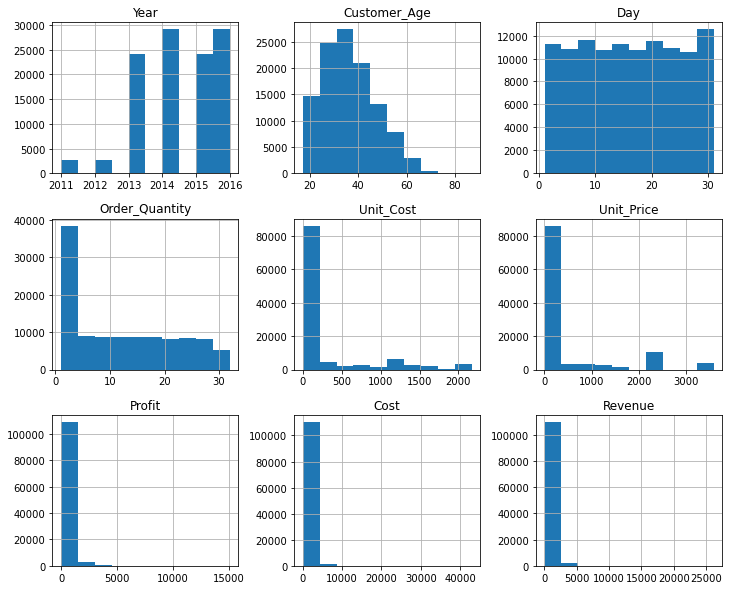

In [18]:
# Univariate Analysis- Numerical features have skewness in different degrees.
# Different scale and skewness will be dealt with during the modeling by using standardization (Standard scaler)

df_bikesales[numerical].hist(figsize=(12,10));

Observation: Year is skewed to the left while Order Quantity,Unit_Cost,Unit_price,Profit,Cost and Revenue are skewed to the right.

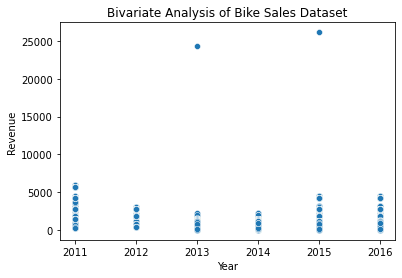

In [19]:
# Bivariate Analysis- To determine the empirical relationships between the features and the Outcome variable

# Create a Scatter plot using dots to visualize relationship between Year and Revenue

sns.scatterplot(x= "Year", y="Revenue", data= df_bikesales)

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis of Bike Sales Dataset')

# Show the plot
plt.show()


Observation: Outliers in 2013 and 2015

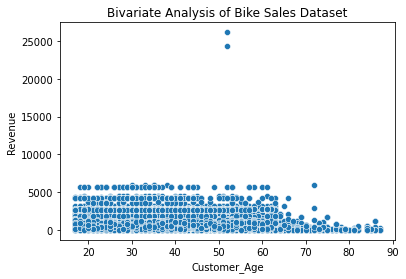

In [20]:
# Bivariate Analysis- To determine the empirical relationships between the features and the Outcome variable

# Create a Scatter plot using dots to visualize relationship between Customer_Age and Revenue

sns.scatterplot(x= "Customer_Age", y="Revenue", data= df_bikesales)


# Set axis labels and title
plt.xlabel('Customer_Age')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis of Bike Sales Dataset')

# Show the plot
plt.show()


Observation:Outliers between 50 and 60 years of Age

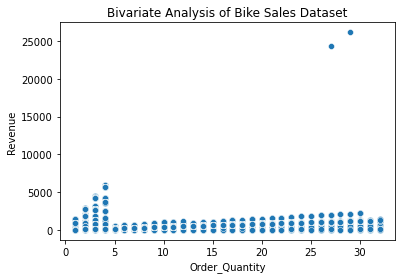

In [21]:
# Bivariate Analysis- To determine the empirical relationships between the features and the Outcome variable

# Create a Scatter plot using dots to visualize relationship between Order_Quantity and Revenue

sns.scatterplot(x= "Order_Quantity", y="Revenue", data= df_bikesales)




# Set axis labels and title
plt.xlabel('Order_Quantity')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis of Bike Sales Dataset')

# Show the plot
plt.show()


Observation:Outliers between 25 and 30 Order Quantity

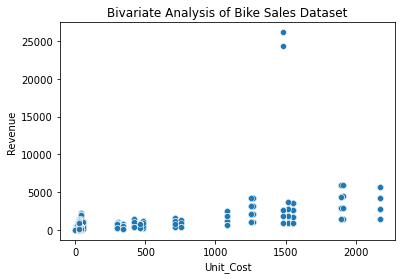

In [22]:
# Bivariate Analysis- To determine the empirical relationships between the features and the Outcome variable

# Create a Scatter plot using dots to visualize relationship between Unit_Cost and Revenue

sns.scatterplot(x= "Unit_Cost", y="Revenue", data= df_bikesales)



# Set axis labels and title
plt.xlabel('Unit_Cost')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis of Bike Sales Dataset')

# Show the plot
plt.show()

Observation:Outliers at 1500 Unit Cost

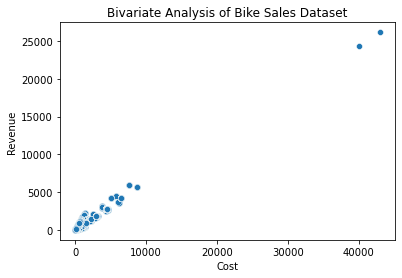

In [23]:
# Bivariate Analysis- To determine the empirical relationships between the features and the Outcome variable

# Create a Scatter plot using dots to visualize relationship between Cost and Revenue

sns.scatterplot(x= "Cost", y="Revenue", data= df_bikesales)


# Set axis labels and title
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis of Bike Sales Dataset')

# Show the plot
plt.show()

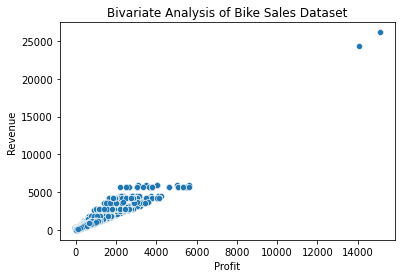

In [24]:
# Bivariate Analysis- To determine the empirical relationships between the features and the Outcome variable

# Create a Scatter plot using dots to visualize relationship between Profit and Revenue

sns.scatterplot(x= "Profit", y="Revenue", data= df_bikesales)


# Set axis labels and title
plt.xlabel('Profit')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis of Bike Sales Dataset')

# Show the plot
plt.show()

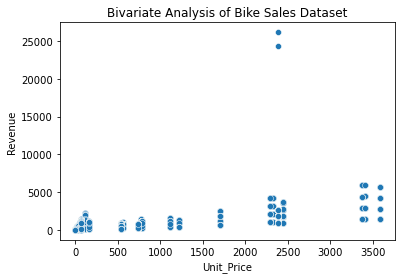

In [25]:
# Bivariate Analysis- To determine the empirical relationships between the features and the Outcome variable

# Create a Scatter plot using dots to visualize relationship between Unit_Price and Revenue

sns.scatterplot(x= "Unit_Price", y="Revenue", data= df_bikesales)



# Set axis labels and title
plt.xlabel('Unit_Price')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis of Bike Sales Dataset')

# Show the plot
plt.show()

Observation:Outliers at 2500 for Unit Price

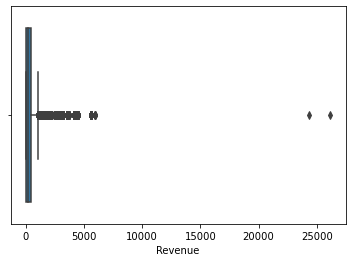

In [26]:
# Removal of Outliers in "Revenue" column as it has high standard deviation- very skewed

sns.boxplot(df_bikesales.Revenue);

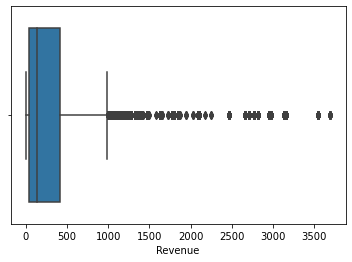

In [27]:
# Seaborn visualization showing revenue less than or equal to 4000

df_bikesales=df_bikesales[df_bikesales.Revenue<=4000]
df_bikesales.shape
sns.boxplot(df_bikesales.Revenue);

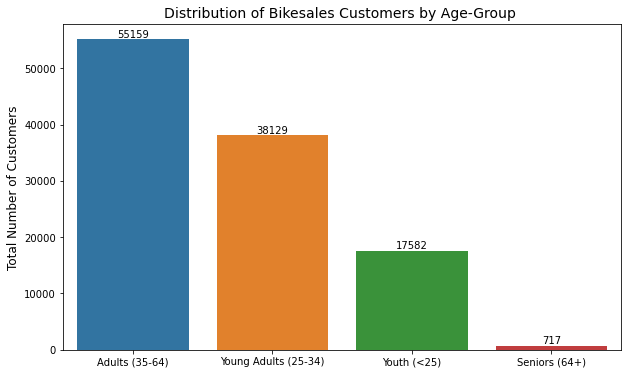

In [28]:
## Analysing the distribution of customers by "Age-Group" Using the Bar chart

Age_Group_data = df_bikesales['Age_Group'].value_counts()
Agedata1 = list(Age_Group_data.index)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Distribution of Bikesales Customers by Age-Group ",fontsize=14)


sns.barplot(x = Agedata1, y = Age_Group_data)

for i in range(len(Age_Group_data)):
    plt.text(i,Age_Group_data[i],Age_Group_data[i],ha='center',va='bottom')
    

# Add label for vertical axis
plt.ylabel("Total Number of Customers",fontsize= 12)
plt.show()

Observation: Adults between ages of 35 and 64 made up the most customers

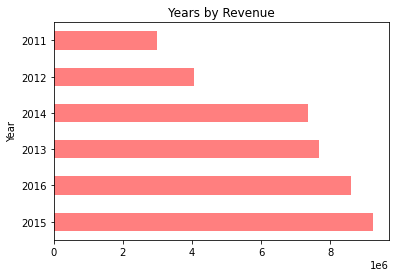

In [29]:
# bikesale Year with the most Revenue

Year_data = df_bikesales.groupby('Year').sum()['Revenue'].sort_values(ascending=False)

Year_data.plot(kind='barh', color='red', alpha=0.5, title='Years by Revenue')
plt.show()

Observation: The most Revenue was made in year 2015

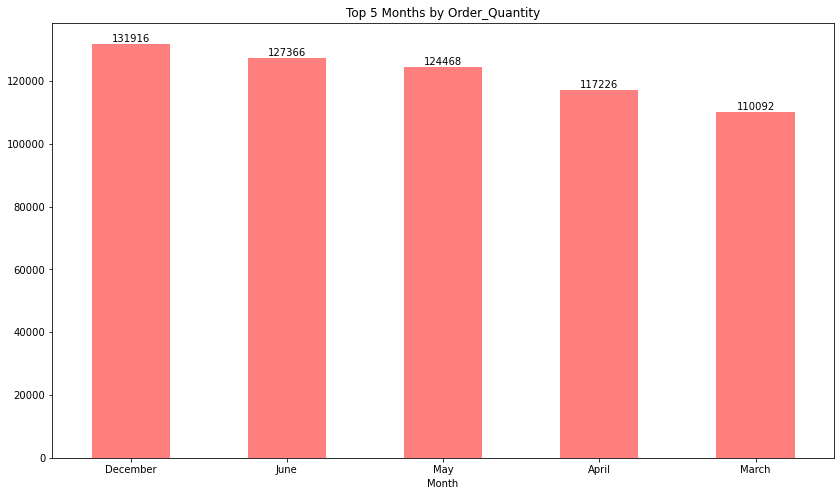

In [30]:
Month_data = df_bikesales.groupby('Month').sum()['Order_Quantity'].sort_values(ascending=False).head(5)

Month_data.plot(kind='bar', color='red', alpha=0.5, title='Years by Revenue', rot=0, figsize=(14,8))
# plt.bar(Month_data.index, Month_data)

for i in range(len(Month_data)):
    plt.text(i,Month_data[i],Month_data[i],ha='center',va='bottom')
    
plt.title('Top 5 Months by Order_Quantity')    
plt.show()

Observation: The month of December has the highest Order Quantity

In [31]:
# Order quantity  based on Gender

Grouped_Gender = df_bikesales.groupby('Customer_Gender').sum()['Order_Quantity'].sort_values(ascending=False)
Gender = list(Grouped_Gender.index)
count = list(Grouped_Gender.values)

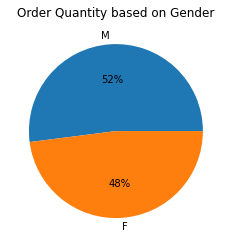

In [32]:
plt.pie(count, labels = Gender,  autopct='%.0f%%')
plt.title('Order Quantity based on Gender')
  
# displaying chart
plt.show()

In [1]:
Observation: Males has the higher Order Quantity than Females

SyntaxError: invalid syntax (2356434471.py, line 1)

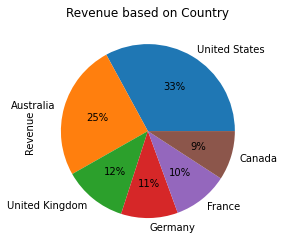

In [33]:
# Revenue made based on Country

Grouped_Country = df_bikesales.groupby('Country').sum()['Revenue'].sort_values(ascending=False)

Grouped_Country.plot(kind='pie', autopct='%.0f%%', title='Revenue based on Country')
plt.show()

Observation: Country with the most Revenue is the United State

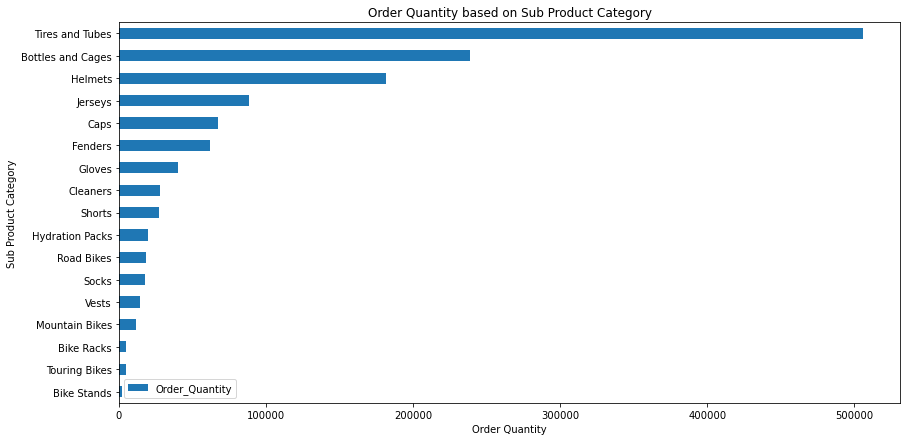

In [34]:
# Sub-product Category ordered the most

Order_Quantity_Subcat = df_bikesales[['Sub_Category','Order_Quantity']]\
                .groupby('Sub_Category')\
                .sum()\
                .sort_values('Order_Quantity', ascending=True)
    
Order_Quantity_Subcat.index.name = 'Sub Product Category'

Order_Quantity_Subcat.plot(kind='barh', figsize=(14,7))
plt.xlabel('Order Quantity')
plt.title('Order Quantity based on Sub Product Category');


Observation: Tires and Tubes are the sub-product ordered the most

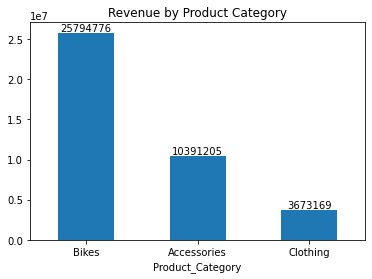

In [35]:
# Revenue based on Product Category

Grouped_Product = df_bikesales.groupby('Product_Category').sum()['Revenue'].sort_values(ascending=False)

Grouped_Product.plot(kind='bar', rot=0, title='Revenue by Product Category')
for i in range(len(Grouped_Product)):
    plt.text(i, Grouped_Product[i], Grouped_Product[i], ha='center', va = 'bottom')
plt.show()

Observation: Bikes are the product that generates the highest Revenue

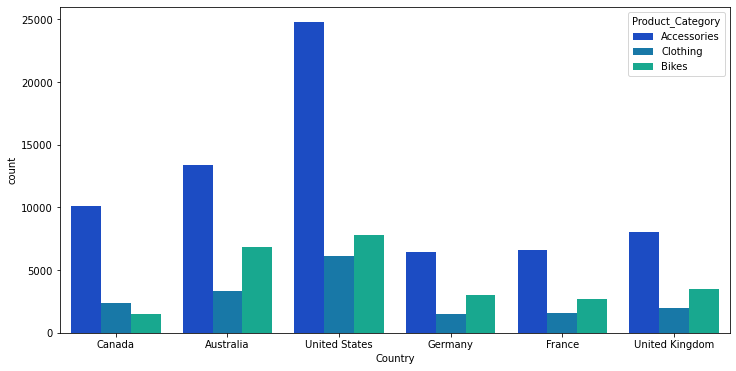

In [36]:
df_bikesales.groupby(['Country', 'Product_Category'])['Revenue'].sum()
sns.countplot(data = df_bikesales, x ='Country', hue ='Product_Category', palette = ('winter'))
plt.gcf().set_size_inches(12,6)

Observation: Accessories generates the most Revenue with United State being the highest country by Revenue.

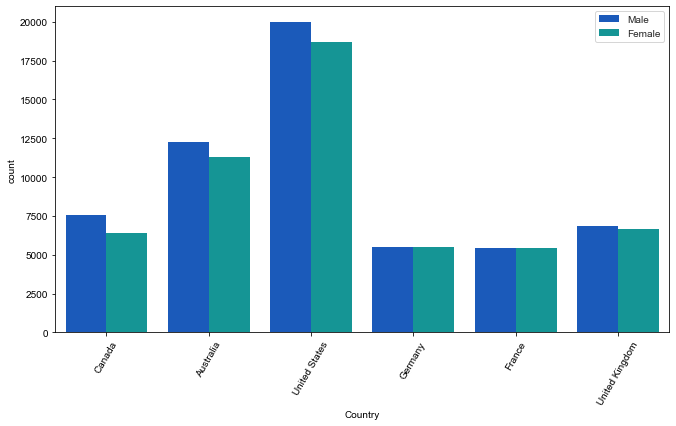

In [37]:
sns.countplot(data = df_bikesales, x ='Country', hue ='Customer_Gender',palette = ('winter'))
plt.xticks(rotation=60)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(11,6)
plt.show()

Observation: The United State has the highest number of customers-both Male and Female

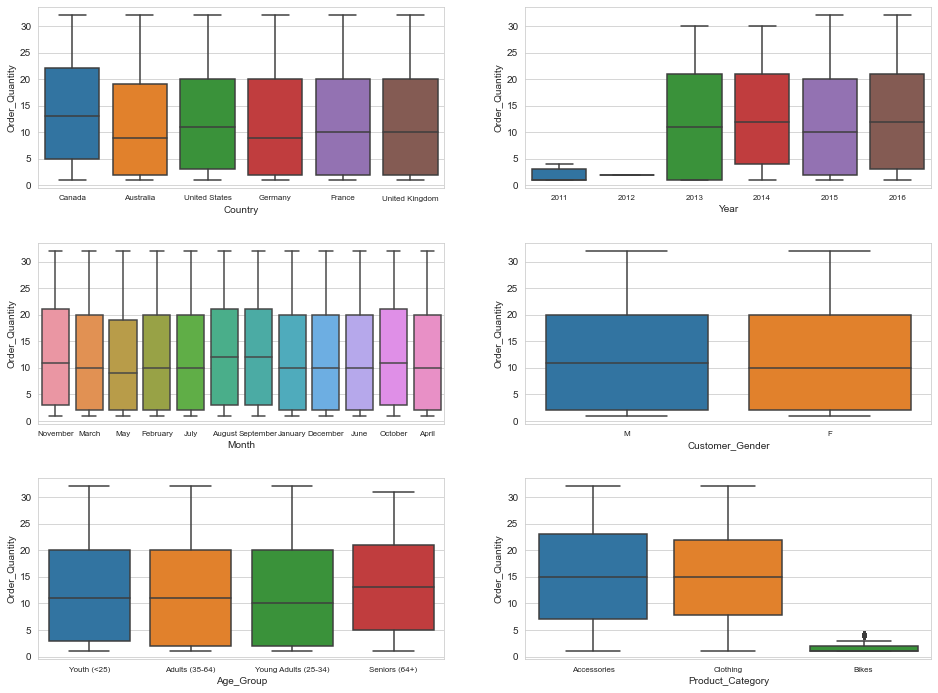

In [38]:
# Displaying the distribution of order quantity data using box plots

# Features to plot
columns = ['Country', 'Year', 'Month', 'Customer_Gender', 'Age_Group', 'Product_Category']

# Creating subplot axes
fig, axes = plt.subplots(3, 2, figsize=(16,12), sharey=False)

# Iterating through axes and columns
for name, ax in zip(columns, axes.flatten()):
    sns.boxplot(x=name, y= "Order_Quantity", data=df_bikesales, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    plt.subplots_adjust(hspace=0.3);    


Box plot analysis between "Order Quantity" and 'Country', 'Year', 'Month', 'Customer_Gender', 'Age_Group', 'Product_Category'

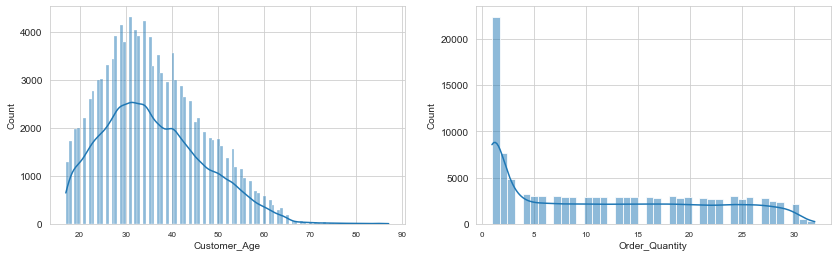

In [39]:
# Plot of customer Age and Order Quantity distributions

# Features to plot

columns = ['Customer_Age', 'Order_Quantity']

# Creating subplot axes
fig, axes = plt.subplots(1, 2, figsize=(14,4), sharey=False)

# Iterating through axes and columns
for name, ax in zip(columns, axes.flatten()):
    sns.histplot(x=name, kde=True, data=df_bikesales, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    #ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.3);

Observation: the distribution shows that most of the customers are between the ages of 30 and 40

# Feature Selection

In [40]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, df_bikesales['Revenue']) 

df_cat = df_bikesales[categorical].apply(cat_mut_inf) 
df_cat = df_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
df_cat

,mutual_info_score
Product,2.401725
Sub_Category,1.622800
Product_Category,0.674012
State,0.093816
Country,0.035343
Month,0.027461
Customer_Gender,0.003264


Observation: Mutual Info Score is the degree of independence between categorical and a target variable, the higher the values of mutual info, the higher the degree of independence

High mutual info score means better prediction on target variable

Product has the most effect on Revenue

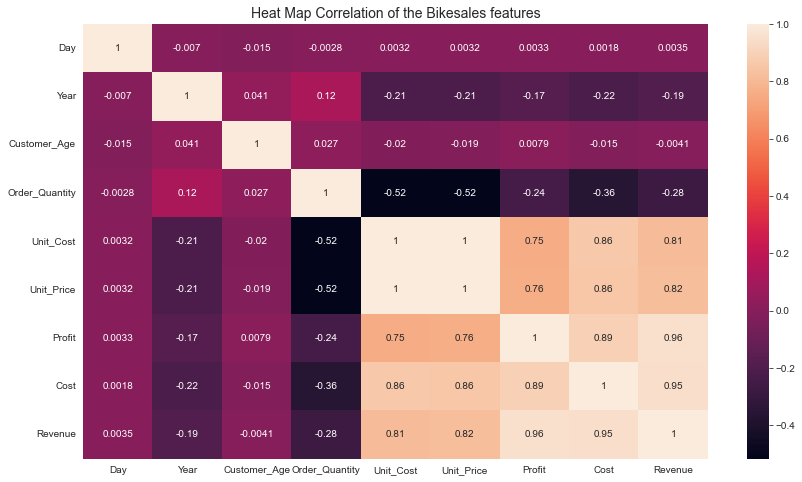

In [41]:
# Correlation Matrix of the dataset indicating the financial fields are well correlated

correlation_matrix = df_bikesales.corr()

plt.figure(figsize = (14,8))
sns.heatmap(correlation_matrix,annot=True)
plt.title('Heat Map Correlation of the Bikesales features', fontsize=14)
plt.show()

Observation: Multicollinearity of the independent variables especially the financial fields

Variable Inflation Factor used to determine multicollinearity and the strenght of the correlation

In [43]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
#find design matrix for regression model using 'Revenue' as response variable(Output) 
y, X = dmatrices('Revenue ~ Day+Year+Customer_Age+Order_Quantity+Unit_Cost+Unit_Price+Profit+Cost', data=df_bikesales, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df)


         variable           VIF
0       Intercept  2.679128e+06
1             Day  1.000297e+00
2            Year  1.058583e+00
3    Customer_Age  1.004071e+00
4  Order_Quantity  1.476668e+00
5       Unit_Cost  3.009527e+02
6      Unit_Price  2.944466e+02
7          Profit  6.245326e+00
8            Cost  9.456065e+00


Observation: VIF values greater than 5 indicates very strong correlation. This information helps in my feature selection.

In [45]:
## Removal of the "Date", "Day" and "State" Columns as they are not necessary for my Machine Learning predictions.

df_bikesales.drop('Date', axis=1, inplace=True)
df_bikesales.drop('Day',axis=1, inplace=True)
df_bikesales.drop("State" , axis=1, inplace=True)
df_bikesales.head(5)

,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,November,2013,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,600
1,November,2015,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,600
2,March,2014,49,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,1725
3,March,2016,49,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,1500
4,May,2014,47,Adults (35-64),F,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,300


In [46]:
## Removal of the "Unit cost", "Profit" and "Cost" Columns from my dataset,they are dependable on one another and highly correlated. 

df_bikesales.drop('Unit_Cost', axis=1, inplace=True)
df_bikesales.drop("Profit" , axis=1, inplace=True)
df_bikesales.drop("Cost" , axis=1, inplace=True)
df_bikesales.head(5)

,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Price,Revenue
0,November,2013,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,120,600
1,November,2015,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,120,600
2,March,2014,49,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,120,1725
3,March,2016,49,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,120,1500
4,May,2014,47,Adults (35-64),F,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,120,300


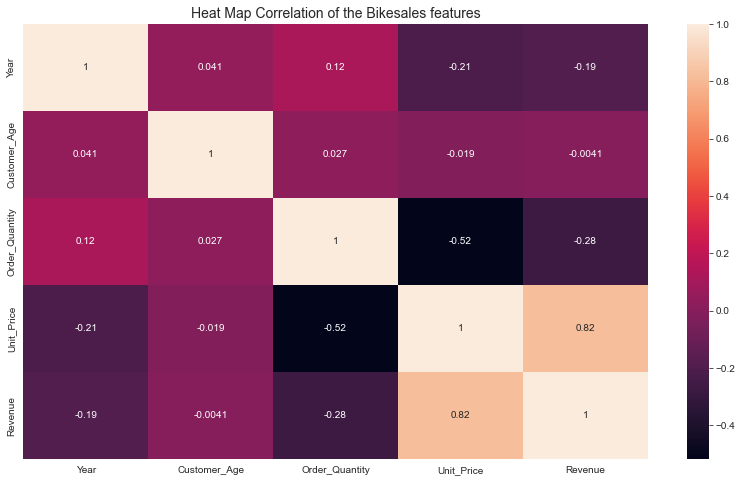

In [47]:
# Heat Map Correlation Matrix of the relevant features for Machine Learning Predictions.

correlation = df_bikesales.corr()

plt.figure(figsize = (14,8))
sns.heatmap(correlation,annot=True)
plt.title('Heat Map Correlation of the Bikesales features', fontsize=14)
plt.show()

In [48]:
Bikes_product = df_bikesales.select_dtypes(exclude=['object']).copy()
Bikes_product

,Year,Customer_Age,Order_Quantity,Unit_Price,Revenue
0,2013,19,8,120,600
1,2015,19,8,120,600
2,2014,49,23,120,1725
3,2016,49,20,120,1500
4,2014,47,4,120,300
...,...,...,...,...,...
113031,2016,41,3,64,120
113032,2014,18,22,64,880
113033,2016,18,22,64,880
113034,2014,37,24,64,960


In [49]:
Bikes_product['Customer_Age'] = df_bikesales['Customer_Age']
Bikes_product['Customer_Gender'] = df_bikesales['Customer_Gender']
Bikes_product['Country'] = df_bikesales['Country']
Bikes_product['Product_Category'] = df_bikesales['Product_Category']
Bikes_product

,Year,Customer_Age,Order_Quantity,Unit_Price,Revenue,Customer_Gender,Country,Product_Category
0,2013,19,8,120,600,M,Canada,Accessories
1,2015,19,8,120,600,M,Canada,Accessories
2,2014,49,23,120,1725,M,Australia,Accessories
3,2016,49,20,120,1500,M,Australia,Accessories
4,2014,47,4,120,300,F,Australia,Accessories
...,...,...,...,...,...,...,...,...
113031,2016,41,3,64,120,M,United Kingdom,Clothing
113032,2014,18,22,64,880,M,Australia,Clothing
113033,2016,18,22,64,880,M,Australia,Clothing
113034,2014,37,24,64,960,F,France,Clothing


In [50]:

# Conversion of categorical variables to numerical values
# One hot encoding conversion without arbituary ordering

Bikes_product = pd.get_dummies(Bikes_product)
Bikes_product

,Year,Customer_Age,Order_Quantity,Unit_Price,Revenue,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
0,2013,19,8,120,600,0,1,0,1,0,0,0,0,1,0,0
1,2015,19,8,120,600,0,1,0,1,0,0,0,0,1,0,0
2,2014,49,23,120,1725,0,1,1,0,0,0,0,0,1,0,0
3,2016,49,20,120,1500,0,1,1,0,0,0,0,0,1,0,0
4,2014,47,4,120,300,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016,41,3,64,120,0,1,0,0,0,0,1,0,0,0,1
113032,2014,18,22,64,880,0,1,1,0,0,0,0,0,0,0,1
113033,2016,18,22,64,880,0,1,1,0,0,0,0,0,0,0,1
113034,2014,37,24,64,960,1,0,0,0,1,0,0,0,0,0,1


In [51]:
# Split the Bike_product dataframe into training , testing, features, targets

X = Bikes_product.drop("Revenue" , axis = 1)  # This generates the input variables(independent)
y = Bikes_product["Revenue"]   # This is the output or outcome variable(dependent)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% for testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)

X_train_val

,Year,Customer_Age,Order_Quantity,Unit_Price,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
108927,2016,46,3,2384,1,0,0,0,1,0,0,0,0,1,0
13410,2014,31,7,5,1,0,1,0,0,0,0,0,1,0,0
94996,2013,30,28,5,1,0,1,0,0,0,0,0,1,0,0
1872,2013,52,22,5,1,0,0,1,0,0,0,0,1,0,0
70156,2013,22,1,1701,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77731,2015,59,13,2,1,0,0,0,0,0,0,1,1,0,0
111713,2015,24,1,2384,0,1,0,0,0,0,1,0,0,1,0
105062,2014,21,29,2,0,1,0,0,0,0,0,1,1,0,0
860,2014,61,10,159,0,1,0,0,0,0,0,1,1,0,0


In [52]:
y_train_val

108927    2706
13410       21
94996       84
1872        66
70156      618
          ... 
77731       13
111713     902
105062      29
860       1000
16009      138
Name: Revenue, Length: 89269, dtype: int64

In [53]:
X_test

,Year,Customer_Age,Order_Quantity,Unit_Price,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
101757,2016,27,25,25,1,0,0,0,0,0,1,0,1,0,0
66060,2014,49,1,1120,1,0,0,0,0,0,0,1,0,1,0
81749,2016,40,29,30,0,1,0,1,0,0,0,0,1,0,0
19329,2016,37,27,9,0,1,0,0,0,0,0,1,0,0,1
20857,2016,28,21,9,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98132,2014,40,16,2,1,0,0,0,0,0,0,1,1,0,0
100779,2016,20,5,4,0,1,0,0,0,0,0,1,1,0,0
96370,2015,32,22,29,0,1,0,0,0,1,0,0,1,0,0
56000,2014,36,1,2295,0,1,0,0,0,0,0,1,0,1,0


In [54]:
X_train


,Year,Customer_Age,Order_Quantity,Unit_Price,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
3045,2014,48,17,5,0,1,0,1,0,0,0,0,1,0,0
83268,2013,38,4,25,1,0,0,0,0,0,1,0,1,0,0
81679,2015,40,1,30,0,1,0,1,0,0,0,0,1,0,0
34903,2016,29,12,35,0,1,0,0,0,0,0,1,1,0,0
62271,2015,35,1,1701,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77731,2015,59,13,2,1,0,0,0,0,0,0,1,1,0,0
111713,2015,24,1,2384,0,1,0,0,0,0,1,0,0,1,0
105062,2014,21,29,2,0,1,0,0,0,0,0,1,1,0,0
860,2014,61,10,159,0,1,0,0,0,0,0,1,1,0,0


In [55]:
y_train

3045        51
83268       64
81679       19
34903      264
62271      618
          ... 
77731       13
111713     902
105062      29
860       1000
16009      138
Name: Revenue, Length: 83690, dtype: int64

# Data Normalization with standard scaler

In [56]:
# Balancing of the data through "Scaler" to optimize the result.

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_val  = scaler.transform(X_val.values)
X_test = scaler.transform(X_test.values)          #Display the standardidzed data
X_test

array([[ 1.26036628, -0.81164841,  1.36552674, ...,  0.78210334,
        -0.54253915, -0.42357227],
       [-0.31731841,  1.19009672, -1.14255225, ..., -1.27860341,
         1.84318496, -0.42357227],
       [ 1.26036628,  0.37120099,  1.78353991, ...,  0.78210334,
        -0.54253915, -0.42357227],
       ...,
       [ 0.47152394, -0.35670633,  1.05201687, ...,  0.78210334,
        -0.54253915, -0.42357227],
       [-0.31731841,  0.00724733, -1.14255225, ..., -1.27860341,
         1.84318496, -0.42357227],
       [ 1.26036628,  1.82701563, -1.14255225, ..., -1.27860341,
        -0.54253915,  2.36087223]])

# Regression Algorithms

# 1. Linear Regression

In [57]:
# Linear Regression

# Training
model_linear = LinearRegression().fit(X_train,y_train)

model_linear.score(X_train,y_train)

0.6999306074777474

In [58]:
# Validation

model_linear.fit(X_val, y_val)
print(f'Linear Regression val R^2: {model_linear.score(X_val, y_val):.3f}')


Linear Regression val R^2: 0.703


In [59]:
# Testing

model_linear.fit(X_test, y_test)
print(f'Linear Regression test R^2: {model_linear.score(X_test, y_test):.3f}')


Linear Regression test R^2: 0.702


In [60]:
X_test.shape

(22318, 15)

In [61]:
y_test.shape

(22318,)

In [62]:
# Predictions using the testing datasets, outputs a numpy array of values

Revenue_y_pred_linear = model_linear.predict(X_test)
model_linear.predict(X_test)

array([ 241.129472  ,  612.59508775,  307.01862228, ...,  235.03476764,
       1220.35560411,   57.37705297])

In [63]:

# Calculate the mean squared error to evaluate performance

mse_linear = mean_squared_error(y_test, Revenue_y_pred_linear)

# Print the mean squared error
print('Mean Squared Error For Linear Regression: ', mse_linear)

mae_linear = mean_absolute_error(y_test, Revenue_y_pred_linear)
print("Mean Absolute Error For Linear Regression: {:.3f}".format(mae_linear))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, Revenue_y_pred_linear))

Mean Squared Error For Linear Regression:  79633.49723205145
Mean Absolute Error For Linear Regression: 178.084
Coefficient of determination: 0.70


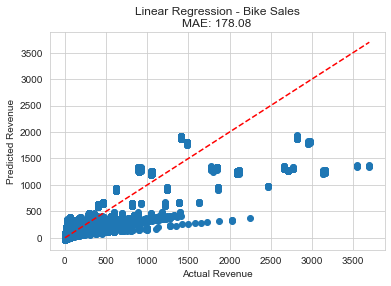

In [64]:
# Create a scatter plot of the actual vs. predicted Revenue values
plt.scatter(y_test, Revenue_y_pred_linear)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')

# Add axis labels and a title
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Linear Regression - Bike Sales\nMAE: {mae_linear:.2f}')

# Show the plot
plt.show()

# 2. Ridge Regression

In [65]:
# Ridge Regression

#Training

lr_model_ridge = Ridge(alpha = 0.1)# Alpha is set to a lower value to prevent overfitting
lr_model_ridge.fit(X_train, y_train)
print(f'Ridge Regression train R^2: {lr_model_ridge.score(X_train, y_train):.3f}')


# Validation

lr_model_ridge.fit(X_val, y_val)
print(f'Ridge Regression val R^2: {lr_model_ridge.score(X_val, y_val):.3f}')

# Testing

lr_model_ridge.fit(X_test, y_test)
print(f'Ridge Regression test R^2: {lr_model_ridge.score(X_test, y_test):.3f}')


# Make predictions on the testing data
Revenue_y_pred_ridge = lr_model_ridge.predict (X_test)

# Calculate the mean squared error
mse_ridge = mean_squared_error(y_test, Revenue_y_pred_ridge)
# Print the mean squared error
print('Mean Squared Error For Ridge Regression: ', mse_ridge)

# Calculate the mean absolute error
mae_ridge = mean_absolute_error(y_test, Revenue_y_pred_ridge)
print("Mean Absolute Error For Ridge Regression: {:.3f}".format(mae_ridge))




Ridge Regression train R^2: 0.700
Ridge Regression val R^2: 0.703
Ridge Regression test R^2: 0.702
Mean Squared Error For Ridge Regression:  79633.49724926258
Mean Absolute Error For Ridge Regression: 178.084


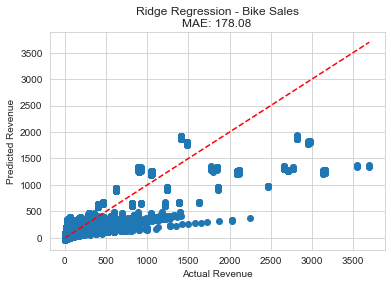

In [66]:
# Create a scatter plot of the actual vs. predicted sales values
plt.scatter(y_test, Revenue_y_pred_ridge)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')

# Add axis labels and a title
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Ridge Regression - Bike Sales\nMAE: {mae_ridge:.2f}')

# Show the plot
plt.show()

# 3. Polynomial Regression

In [67]:
# Polynomial Regression

# Training

poly = PolynomialFeatures() 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression().fit(X_train_poly,y_train)
lm_poly.score (X_train_poly,y_train)


0.9767085636551475

In [68]:
# Validation

lm_poly.fit(X_val_poly, y_val)
print(f'Polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

# Testing 

lm_poly.fit(X_test_poly, y_test)
print(f'Polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

#Predictions
Revenue_y_pred_poly = lm_poly.predict(X_test_poly)

# Calculate the mean squared error
mse_poly = mean_squared_error(y_test, Revenue_y_pred_poly)

# Print the mean squared error
print('Mean Squared Error For Polynomial Regression: ', mse_poly)

# Calculate the mean absolute error
mae_poly = mean_absolute_error(y_test, Revenue_y_pred_poly)

# Print the mean absolute error
print('Mean Absolute Error For Polynomial Regression: ', mae_poly)


Polynomial regression val R^2: 0.977
Polynomial regression test R^2: 0.976
Mean Squared Error For Polynomial Regression:  6314.874876781074
Mean Absolute Error For Polynomial Regression:  48.14186979119993


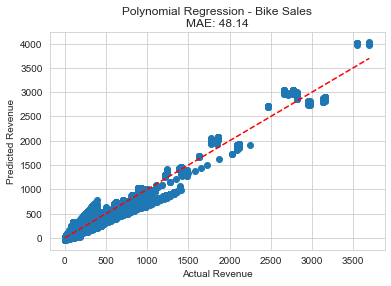

In [69]:
# Create a scatter plot of the actual vs. predicted Revenue values
plt.scatter(y_test, Revenue_y_pred_poly)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')

# Add axis labels and a title
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Polynomial Regression - Bike Sales\nMAE: {mae_poly:.2f}')

# Show the plot
plt.show()

# 4. Decision Tree Regressor

In [70]:
# Decision Tree Regressor

#Training

model_decisiontree = DecisionTreeRegressor (random_state=42)   # Random state is set for reproducible result
model_decisiontree.fit(X_train, y_train)
model_decisiontree.score (X_train,y_train)


0.9999735732603122

In [71]:
#Testing

model_decisiontree.fit(X_test, y_test)
model_decisiontree.score (X_test,y_test)


0.9999863092746742

In [72]:
# To predict the "Revenue" status for the test set
Revenue_y_pred_decisiontree = model_decisiontree.predict(X_test)
model_decisiontree.predict(X_test)

array([ 400.,  407.,  551., ...,  396., 1043.,   15.])

In [73]:

# Calculate the mean squared error to evaluate model performance
mse_decisiontree = mean_squared_error(y_test, Revenue_y_pred_decisiontree)

# Print the mean squared error

print('Mean Squared Error For Decision Tree: ', mse_decisiontree)

# Calculate the mean absolute error to evaluate model performance
mae_decisiontree = mean_absolute_error(y_test, Revenue_y_pred_decisiontree)

# Print the mean absolute error

print('Mean Absolute Error For Decision Tree: ', mae_decisiontree)

Mean Squared Error For Decision Tree:  3.6601666816022944
Mean Absolute Error For Decision Tree:  0.09807330405950354


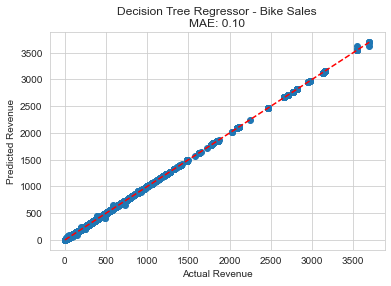

In [74]:
# Create a scatter plot of the actual vs. predicted Revenue values
plt.scatter(y_test, Revenue_y_pred_decisiontree)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')

# Add axis labels and a title
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Decision Tree Regressor - Bike Sales\nMAE: {mae_decisiontree:.2f}')

# Show the plot
plt.show()


# 5. Lasso Regression

In [75]:
# Lasso Regression
#Training

lasso_model = Lasso(alpha = 0.1) # Apha is set to a smaller value to prevent overfitting

lasso_model.fit(X_train, y_train)
lasso_model.score(X_train, y_train)


0.6999305107313644

In [76]:
# Testing

lasso_model.fit(X_test, y_test)
lasso_model.score(X_test, y_test)

0.7021332158405613

In [77]:

# Make predictions on the testing data
Revenue_y_pred_lasso = lasso_model.predict(X_test)

# Calculate the mean squared error
mse_lasso = mean_squared_error(y_test, Revenue_y_pred_lasso)

# Print the mean squared error
print('Mean Squared Error For Lasso Regression: ', mse_lasso)

# Calculate the mean absolute error
mae_lasso = mean_absolute_error(y_test, Revenue_y_pred_lasso)

# Print the mean absolute error
print('Mean Absolute Error For Lasso Regression: ', mae_lasso)


Mean Squared Error For Lasso Regression:  79633.62444231784
Mean Absolute Error For Lasso Regression:  178.05776663192543


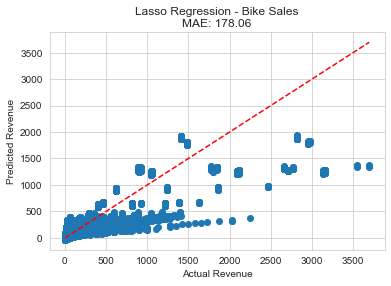

In [78]:
# Create a scatter plot of the actual vs. predicted  Revenue values
plt.scatter(y_test, Revenue_y_pred_lasso)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')

# Add axis labels and a title
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Lasso Regression - Bike Sales\nMAE: {mae_lasso:.2f}')

# Show the plot
plt.show()

# 6. Random Forest Regressor

In [79]:
#  Random Forest Regressor
# n_estimators is the number of decision trees
# random state is used for reproducible results


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9999437993042868

In [80]:
#Testing
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.9999391699911091

In [81]:

# Model evaluation
Revenue_y_pred_randomforest = model.predict(X_test)

# Calculate the mean squared error
mse_randomforest = mean_squared_error(y_test, Revenue_y_pred_randomforest)

# Print the MSE
print(f'Mean Squared Error For Random Forest: {mse_randomforest:.2f}')

# Calculate the mean absolute error
mae_randomforest = mean_absolute_error(y_test, Revenue_y_pred_randomforest)

# Print the MAE
print(f'Mean Absolute Error For Random Forest: {mae_randomforest:.2f}')


Mean Squared Error For Random Forest: 16.26
Mean Absolute Error For Random Forest: 0.77


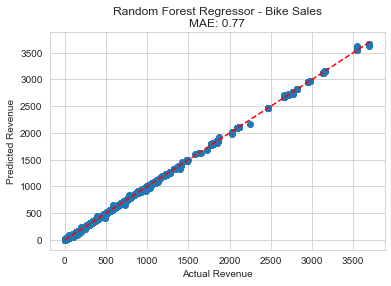

In [82]:
# Create a scatter plot of the actual vs. predicted Revenue values
plt.scatter(y_test, Revenue_y_pred_randomforest)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')

# Add axis labels and a title
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Random Forest Regressor - Bike Sales\nMAE: {mae_randomforest:.2f}')

# Show the plot
plt.show()

Six Algorithms were compared in this ML assessment. Decision tree regressor had the best prediction based on the mean accuracy error. It has the lowest mean accuracy error among the 6 algorithms, The lower the mean accuracy error, the better the machine learning prediction.